# 目标检测和边界框

在前面的一些章节中，我们介绍了诸多用于图像分类的模型。在图像分类任务里，我们假设图像里只有一个主体目标，并关注如何识别该目标的类别。然而，很多时候图像里有多个我们感兴趣的目标，我们不仅想知道它们的类别，还想得到它们在图像中的具体位置。在计算机视觉里，我们将这类任务称为目标检测（object detection）或物体检测。

目标检测在多个领域中被广泛使用。例如，在无人驾驶里，我们需要通过识别拍摄到的视频图像里的车辆、行人、道路和障碍的位置来规划行进线路。机器人也常通过该任务来检测感兴趣的目标。安防领域则需要检测异常目标，如歹徒或者炸弹。

在接下来的几节里，我们将介绍目标检测里的多个深度学习模型。在此之前，让我们来了解目标位置这个概念。先导入实验所需的包或模块。

In [1]:
import tensorflow as tf
import numpy as np
print(tf.__version__)

2.0.0


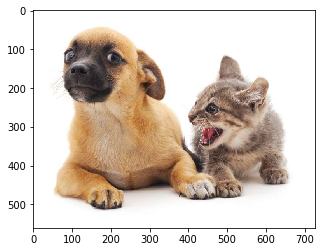

In [2]:
import matplotlib.pyplot as plt

img = plt.imread('catdog.jpg')
plt.imshow(img)

## 边界框

在目标检测里，我们通常使用边界框（bounding box）来描述目标位置。边界框是一个矩形框，可以由矩形左上角的$x$和$y$轴坐标与右下角的$x$和$y$轴坐标确定。我们根据上面的图的坐标信息来定义图中狗和猫的边界框。图中的坐标原点在图像的左上角，原点往右和往下分别为$x$轴和$y$轴的正方向。

In [3]:
# bbox是bounding box的缩写
dog_bbox, cat_bbox = [60, 45, 378, 516], [400, 112, 655, 493]

我们可以在图中将边界框画出来，以检查其是否准确。画之前，我们定义一个辅助函数`bbox_to_rect`。它将边界框表示成matplotlib的边界框格式。

In [4]:
def bbox_to_rect(bbox, color):
    # 将边界框(左上x, 左上y, 右下x, 右下y)格式转换成matplotlib格式：
    # ((左上x, 左上y), 宽, 高)
    return plt.Rectangle(
        xy=(bbox[0], bbox[1]), width=bbox[2]-bbox[0], height=bbox[3]-bbox[1],
        fill=False, edgecolor=color, linewidth=2)

我们将边界框加载在图像上，可以看到目标的主要轮廓基本在框内。

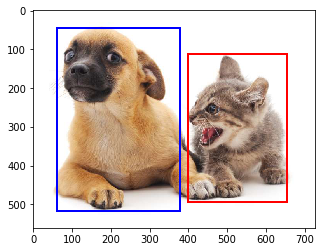

In [5]:
fig = plt.imshow(img)
fig.axes.add_patch(bbox_to_rect(dog_bbox, 'blue'))
fig.axes.add_patch(bbox_to_rect(cat_bbox, 'red'));

## 小结

* 在目标检测里不仅需要找出图像里面所有感兴趣的目标，而且要知道它们的位置。位置一般由矩形边界框来表示。